# Energy Efficiency 

This work aims at relating the energy consumption of the buildings with their shape. 12 different building shapes were examined for energy analysis. There are eight input variables consisting of relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution. These input variables will be analyzed using statistical analysis to examine the effect on two output variables, namely heating load and cooling load.

## Variables Information:
* Relative Compactness
* Surface Area - m²
* Wall Area - m²
* Roof Area - m²
* Overall Height - m
* Orientation - 2:North, 3:East, 4:South, 5:West
* Glazing Area - 0%, 10%, 25%, 40% (of floor area)
* Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West
* Heating Load - kWh
* Cooling Load - kWh

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import StratifiedKFold

#  Data Import

The source of the dataset is from the UCI machine learning site, the extension is
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency.

In [2]:
df = pd.read_csv('/Users/Cansel/Desktop/İTÜ_BİG_DATA/ENB2012_data.csv')

# Description and Characterisation of Dataset

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


* The dataset contains eight attributes (represented by X1 ... X8) and two responses (represented by Y1 and Y2). Specifically: X1 Relative Compactness, X2 Surface Area, X3 Wall Area, X4 Roof Area, X5 Overall Height, X6 Orientation, X7 Glazing Area, X8 Glazing Area Distribution,Y1 Heating Load, Y2 Cooling Load.

In [4]:
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [5]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [7]:
df.dtypes

relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
cooling_load                 float64
dtype: object

In [8]:
df.shape

(768, 10)

In [9]:
df.size

7680

In [10]:
X = (df.drop(columns=df[['heating_load', 'cooling_load']], axis=0))
y = (df.iloc[:, -2:])

print('\n', 'X shape:',
      X.shape, '\n',
      'y shape:', y.shape)


 X shape: (768, 8) 
 y shape: (768, 2)


In [11]:
df.eq(0).sum()

relative_compactness          0
surface_area                  0
wall_area                     0
roof_area                     0
overall_height                0
orientation                   0
glazing_area                 48
glazing_area_distribution    48
heating_load                  0
cooling_load                  0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


* The dataset consists of 768 samples and 8 attributes aimed at predicting two real-valued responses.

# Descriptive Statistics

* Descriptive statistics are used to describe the basic features of the data in this study to make the understanding of the data easier. Measures of central tendency, measures of dispersion and measures of position are used for descriptive statistics. 

In [13]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [14]:
df.var()

relative_compactness            0.011189
surface_area                 7759.163842
wall_area                    1903.269883
roof_area                    2039.963060
overall_height                  3.066493
orientation                     1.251630
glazing_area                    0.017748
glazing_area_distribution       2.405476
heating_load                  101.812050
cooling_load                   90.502983
dtype: float64

In [15]:
df.median()

relative_compactness           0.75
surface_area                 673.75
wall_area                    318.50
roof_area                    183.75
overall_height                 5.25
orientation                    3.50
glazing_area                   0.25
glazing_area_distribution      3.00
heating_load                  18.95
cooling_load                  22.08
dtype: float64

* Values such as mean, median, variance, and standard deviation are very different from each other in the descriptive statiscs. Preprocessing is required as it will not be suitable for the model to be made. It is explained in the preprocessing section.

* The statistical graphs is a tool that helps you obtain information about the shape or distribution of data in the data. A graph or chart can be a more efficient way of presenting data than a stack of numbers so that you can see where the data sets are and where only a few data values are.

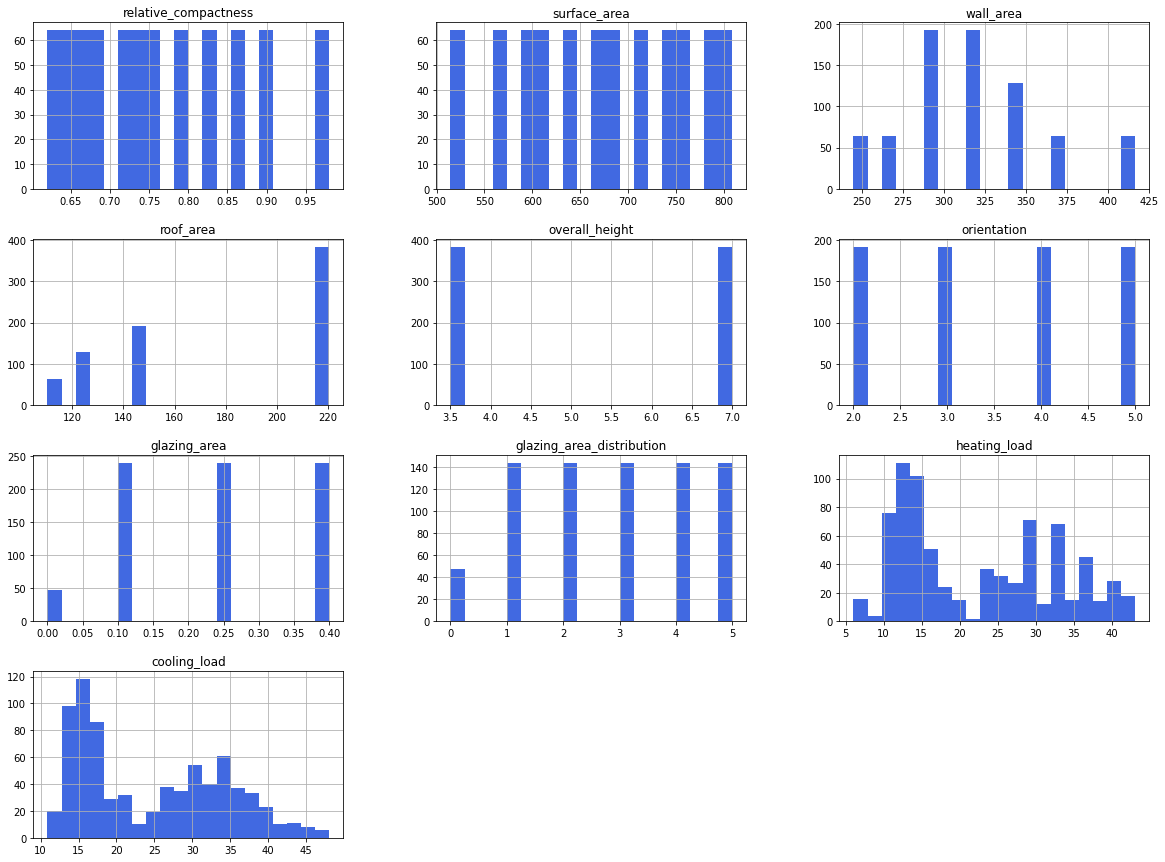

In [16]:
df.hist(bins=20, figsize=(20,15),  color = "royalblue")
plt.show()

* Histogram allows us to show the distribution of data groups in the graphs in detail.

<Figure size 360x360 with 0 Axes>

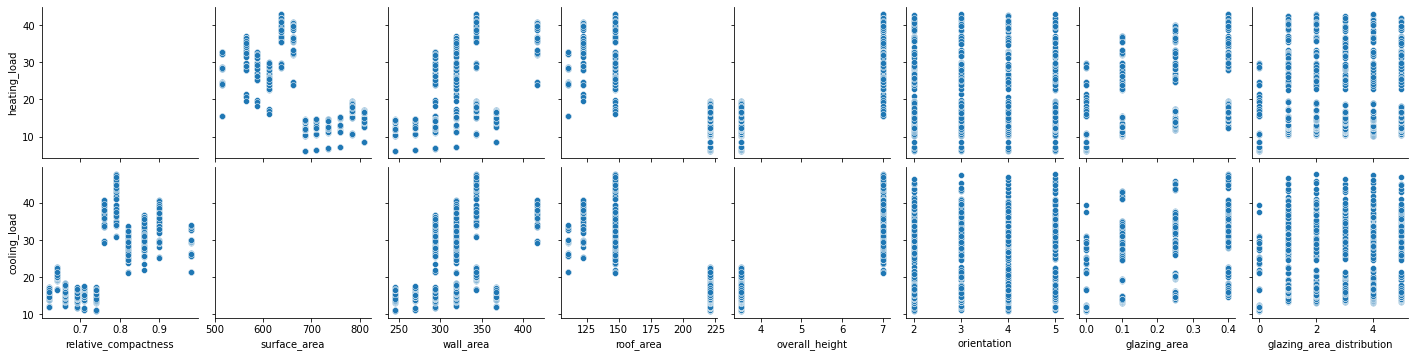

In [17]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df, y_vars=['heating_load','cooling_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

* For example, scatter plots for relative compactness and surface area are shown in detail as follows.

In [18]:
df['relative_compactness'].unique().size

12

<function matplotlib.pyplot.show(close=None, block=None)>

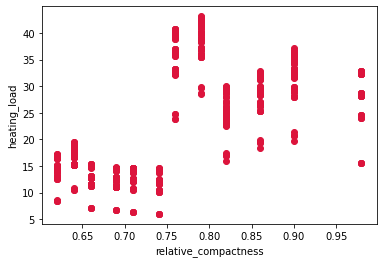

In [19]:
x = df['relative_compactness']
y = df['heating_load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('relative_compactness')
plt.ylabel('heating_load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

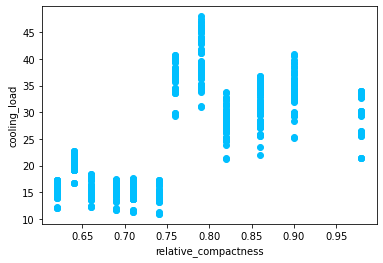

In [20]:
x = df['relative_compactness']
y = df['cooling_load']
plt.scatter(x, y, color ="deepskyblue")
plt.xlabel('relative_compactness')
plt.ylabel('cooling_load')
plt.show

In [21]:
df['surface_area'].unique().size

12

<function matplotlib.pyplot.show(close=None, block=None)>

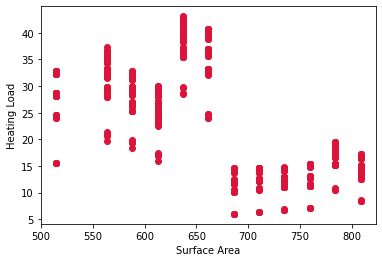

In [22]:
x = df['surface_area']
y = df['heating_load']
plt.scatter(x, y, color ="crimson")
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

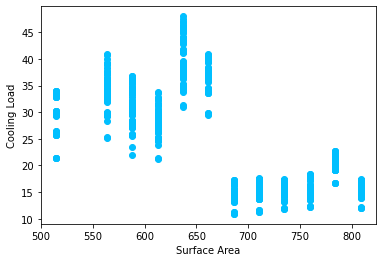

In [23]:
x = df['surface_area']
y = df['cooling_load']
plt.scatter(x, y, color ="deepskyblue")
plt.xlabel('Surface Area')
plt.ylabel('Cooling Load')
plt.show

*  Scatter plots are used to observe relationships between variables. It can be said that relative compactness and overall height can have a positive relationship in both heating load and cooling load. Also, it can be said that surface area and roof area have a negative relationship with both heating load and cooling load. It can be said that there is no relationship for both heating load and cooling load in glazing area distribution and orientation.

In [24]:
df.corr(method='pearson')

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
surface_area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
wall_area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
roof_area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
overall_height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
glazing_area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
glazing_area_distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
heating_load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
cooling_load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot:>

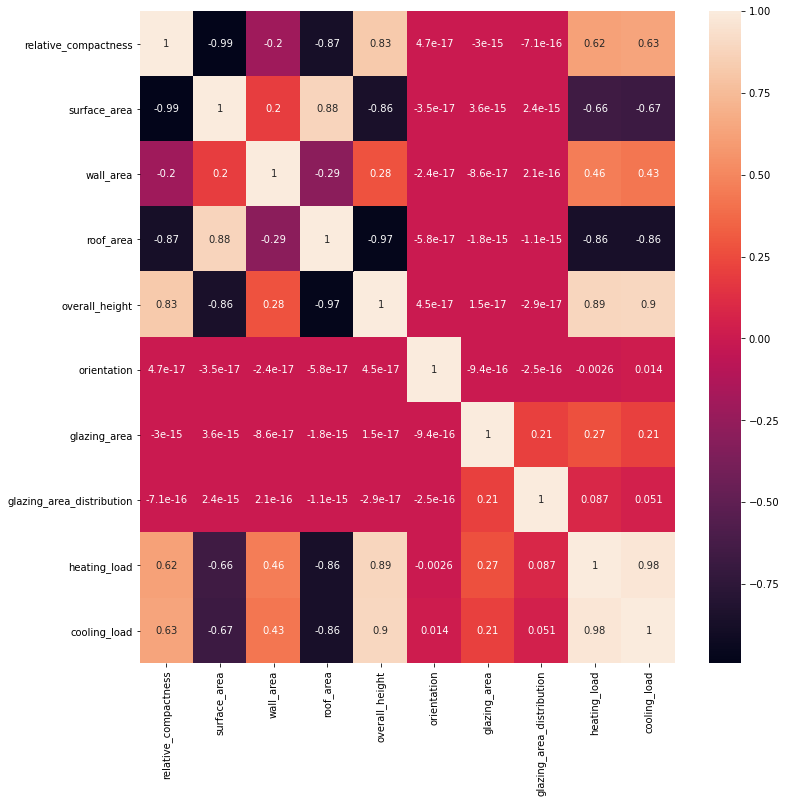

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

* The relationship between relative compactness and surface area is very close to -1, which confirms that there is a negative relationship between them. It is understood that there is a negative relationship between the roof area and the overall height.Relative compactness and overall height close to 1, which indicates a positive relationship between them. Also, overall height has positive relationships with both heating load and cooling load. It is understood that orientation and glazing area distribution, did not have an effect on the response variables, and there was no significant relationship.

# Data Preprocessing

* Data pre-processing techniques are used to provide accurate, efficient or meaningful analysis.
* First of all, data cleaning and the method of finding, removing and replacing bad or missing data was examined. There is no missing or outlier value. 
* Descriptive statistical analysis was performed on the energy efficiency dataset. As a result, values such as mean, variance, and standard deviation were found to be very different from each other. Therefore, pre-processing should take place.
* Normalization has been made in the data. Data normalization enables it to convert data into a common format to enable data to be processed and analyzed. Normalizes values between 0 and 1.

In [27]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [28]:
d = preprocessing.normalize(df)
scaled_df = pd.DataFrame(d, columns=df.columns)

In [29]:
scaled_df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.001624,0.852714,0.487265,0.182725,0.011602,0.003315,0.0,0.0,0.025772,0.035352
1,0.001624,0.852709,0.487262,0.182723,0.011601,0.004972,0.0,0.0,0.025772,0.035351
2,0.001624,0.852700,0.487257,0.182722,0.011601,0.006629,0.0,0.0,0.025772,0.035351
3,0.001624,0.852690,0.487251,0.182719,0.011601,0.008287,0.0,0.0,0.025771,0.035351
4,0.001364,0.854113,0.482759,0.185677,0.010610,0.003031,0.0,0.0,0.031588,0.042865


In [30]:
scaled_df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.001027,0.874187,0.418857,0.227665,0.007158,0.004628,0.000310,0.003719,0.030377,0.033365
std,0.000272,0.020407,0.061823,0.041046,0.003036,0.001594,0.000181,0.002115,0.015546,0.015095
min,0.000677,0.833785,0.321755,0.154405,0.003823,0.002185,0.000000,0.000000,0.007895,0.013155
25%,0.000823,0.858252,0.369487,0.195201,0.004219,0.003300,0.000135,0.002053,0.015749,0.018905
50%,0.000966,0.877590,0.418410,0.229434,0.006711,0.004532,0.000315,0.003716,0.022347,0.027830
75%,0.001189,0.891525,0.468295,0.260993,0.010023,0.005878,0.000469,0.005419,0.045947,0.047268
max,0.001624,0.901218,0.525755,0.289677,0.011602,0.008287,0.000662,0.008280,0.058195,0.064813


In [31]:
scaled_df.corr(method='pearson')

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000000,-0.594722,0.587752,-0.590475,0.897437,0.352968,0.206421,0.213369,0.726960,0.751502
surface_area,-0.594722,1.000000,-0.990993,0.994902,-0.826346,-0.192627,-0.123151,-0.119252,-0.863769,-0.849694
wall_area,0.587752,-0.990993,1.000000,-0.999446,0.833047,0.188639,0.109063,0.113696,0.860838,0.847675
roof_area,-0.590475,0.994902,-0.999446,1.000000,-0.832784,-0.189948,-0.112748,-0.115269,-0.863017,-0.849605
overall_height,0.897437,-0.826346,0.833047,-0.832784,1.000000,0.312985,0.183229,0.189249,0.907824,0.921506
orientation,0.352968,-0.192627,0.188639,-0.189948,0.312985,1.000000,0.073123,0.075851,0.246534,0.272160
glazing_area,0.206421,-0.123151,0.109063,-0.112748,0.183229,0.073123,1.000000,0.247897,0.388477,0.334424
glazing_area_distribution,0.213369,-0.119252,0.113696,-0.115269,0.189249,0.075851,0.247897,1.000000,0.230141,0.202253
heating_load,0.726960,-0.863769,0.860838,-0.863017,0.907824,0.246534,0.388477,0.230141,1.000000,0.980398
cooling_load,0.751502,-0.849694,0.847675,-0.849605,0.921506,0.272160,0.334424,0.202253,0.980398,1.000000


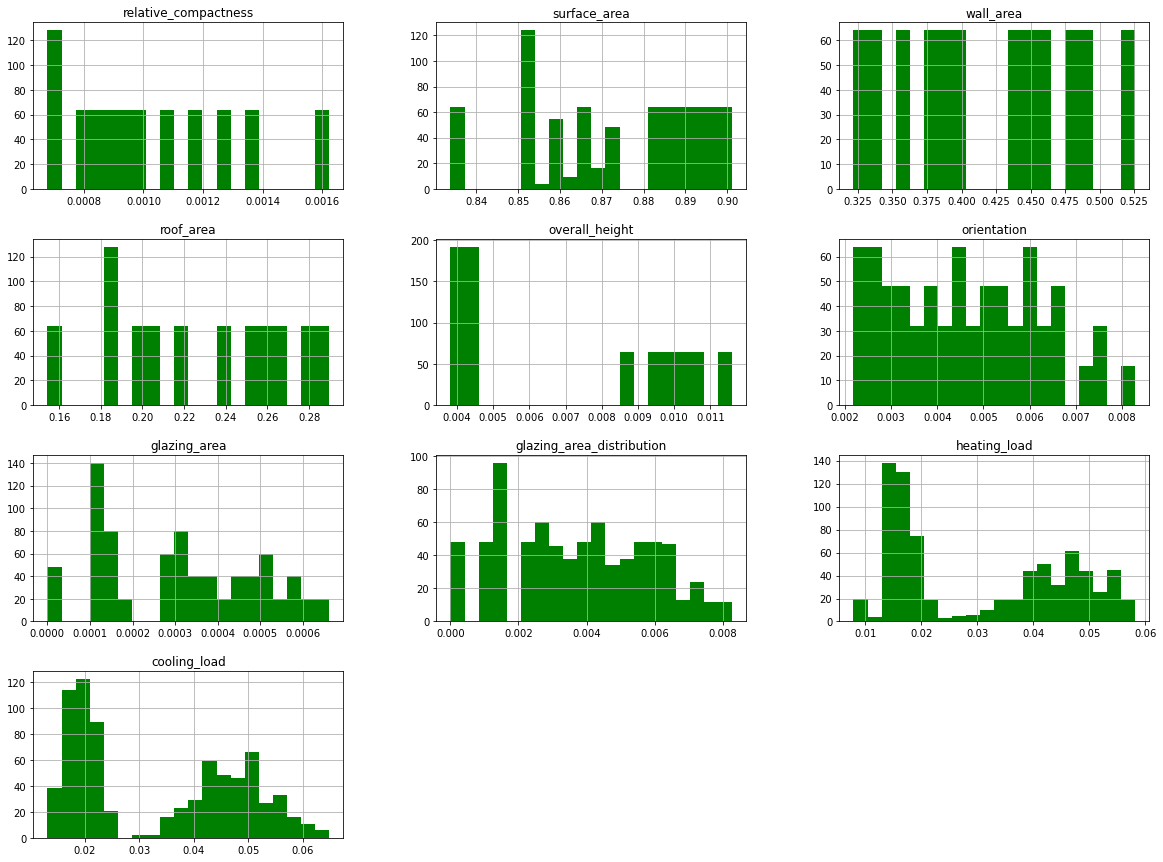

In [32]:
scaled_df.hist(bins=20, figsize=(20,15),  color = "green")
plt.show()

<Figure size 360x360 with 0 Axes>

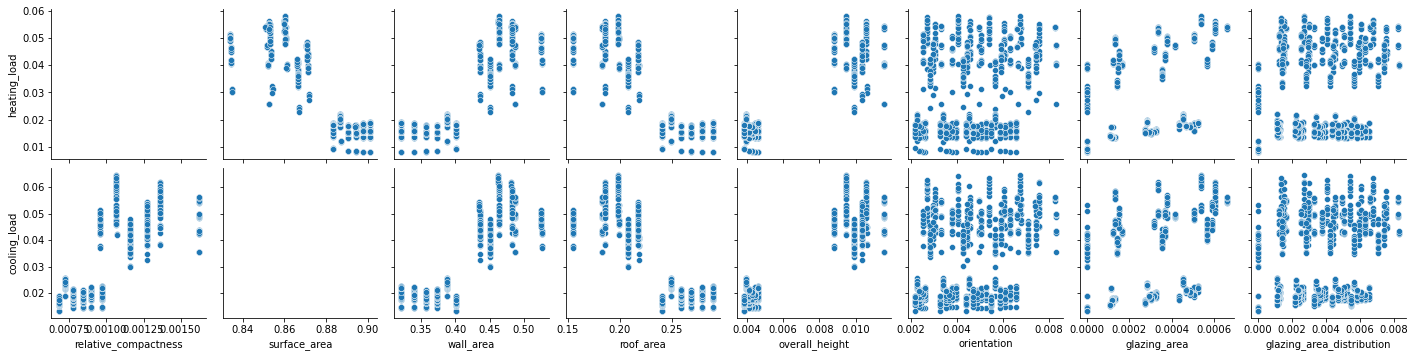

In [33]:
plt.figure(figsize=(5,5))
sns.pairplot(data=scaled_df, y_vars=['heating_load','cooling_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x219e7940700>,
 'caps': [<matplotlib.lines.Line2D at 0x219e7940dc0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x219e79403a0>,
 'medians': [<matplotlib.lines.Line2D at 0x219e88204c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x219e8820820>,
 'means': []}

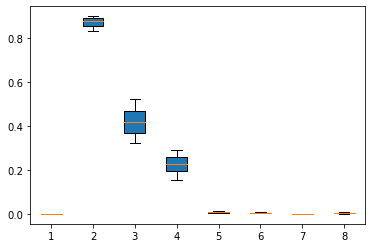

In [34]:
plt.boxplot(scaled_df.iloc[:,:8], widths = 0.5, patch_artist = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x219e88f8be0>,
 'caps': [<matplotlib.lines.Line2D at 0x219e890a280>,
 'boxes': [<matplotlib.lines.Line2D at 0x219e88f89d0>,
 'medians': [<matplotlib.lines.Line2D at 0x219e890a8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x219e890ac10>,
 'means': []}

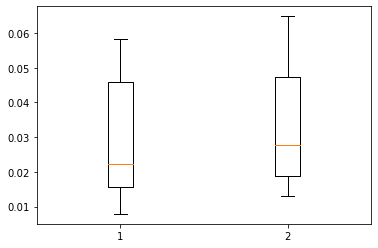

In [35]:
plt.boxplot(scaled_df.iloc[:, -2:])

* Box plots are useful as they provide a visual summary of the data that allows researchers to quickly identify the mean values, distribution of the dataset, and signs of skewness. 
* Interquartile ranges (ie, box lengths) are compared to examine how the data is distributed. The longer the box, the more dispersed the data will be. The smaller the box, the less dispersed the data will be. 
* When boxplots are examined, glazing area distibution values more dispersed than the values of wall area. It is observed that the all median values were different from each other. There is no outlier none of them. Surface area and wall area appears like symmetric. Morever, heating load and cooling load appears right-skewed. So, the top whisker is much longer than the bottom whisker.

In [36]:
X = scaled_df[['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution']]
Y1 = scaled_df[['heating_load']]
Y2 = scaled_df[['cooling_load']]

In [37]:
X.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,0.001624,0.852714,0.487265,0.182725,0.011602,0.003315,0.0,0.0
1,0.001624,0.852709,0.487262,0.182723,0.011601,0.004972,0.0,0.0
2,0.001624,0.852700,0.487257,0.182722,0.011601,0.006629,0.0,0.0
3,0.001624,0.852690,0.487251,0.182719,0.011601,0.008287,0.0,0.0
4,0.001364,0.854113,0.482759,0.185677,0.010610,0.003031,0.0,0.0


In [38]:
Y1.head()

,heating_load
0,0.025772
1,0.025772
2,0.025772
3,0.025771
4,0.031588


In [39]:
Y2.head()

,cooling_load
0,0.035352
1,0.035351
2,0.035351
3,0.035351
4,0.042865


# Variable Elimination

* Variable elimination or selection is used to well predict the response with minimal complexity. Variable selection is the task of determining the best subset of predictors to include in the model among all possible subsets of predictors.

* Backward elimination, a variable selection procedure in which all variables are entered into the equation and then removed sequentially, was applied. Various multiple linear regressions were applied by selecting different attributes.

In [40]:
#so the model will train until only four features are left.
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring='r2')
sfs2 = sfs(lreg, k_features=4, forward=False, verbose=1, scoring='r2')

In [41]:
sfs1 = sfs1.fit(X, Y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

In [42]:
sfs2 = sfs2.fit(X, Y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

In [43]:
feat_names1 = list(sfs1.k_feature_names_)
print(feat_names1)

['relative_compactness', 'roof_area', 'overall_height', 'glazing_area']


In [44]:
feat_names2 = list(sfs1.k_feature_names_)
print(feat_names2)

['relative_compactness', 'roof_area', 'overall_height', 'glazing_area']


In [45]:
#prediction score for these 4 features can be accesses via k_score_:
sfs1.k_score_

0.9159478675982399

In [46]:
sfs2.k_score_

0.9087628500833697

In [48]:
sfs1.subsets_

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.84312673, 0.92204195, 0.94436267, 0.9481888 , 0.94056168]),
  'avg_score': 0.9196563656113591,
  'feature_names': ('relative_compactness',
   'surface_area',
   'wall_area',
   'roof_area',
   'overall_height',
   'orientation',
   'glazing_area',
   'glazing_area_distribution')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.85387878, 0.91703309, 0.94468594, 0.95099049, 0.94756201]),
  'avg_score': 0.9228300619058581,
  'feature_names': ('relative_compactness',
   'surface_area',
   'wall_area',
   'roof_area',
   'overall_height',
   'orientation',
   'glazing_area')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 6),
  'cv_scores': array([0.8538391 , 0.91706906, 0.944774  , 0.95098756, 0.94754863]),
  'avg_score': 0.9228436671286244,
  'feature_names': ('relative_compactness',
   'surface_area',
   'wall_area',
   'roof_area',
   'overall_height',
   'glazing_area')},
 5: {'feature_idx': (0, 2, 3, 4, 6)

In [49]:
sfs2.subsets_

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.88193201, 0.90164038, 0.92322017, 0.92979271, 0.92976766]),
  'avg_score': 0.9132705858738539,
  'feature_names': ('relative_compactness',
   'surface_area',
   'wall_area',
   'roof_area',
   'overall_height',
   'orientation',
   'glazing_area',
   'glazing_area_distribution')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.88914373, 0.90148888, 0.92327599, 0.93101476, 0.93122791]),
  'avg_score': 0.9152302519028256,
  'feature_names': ('relative_compactness',
   'surface_area',
   'wall_area',
   'roof_area',
   'overall_height',
   'orientation',
   'glazing_area')},
 6: {'feature_idx': (0, 2, 3, 4, 5, 6),
  'cv_scores': array([0.88932729, 0.90133906, 0.92319052, 0.93101826, 0.93136552]),
  'avg_score': 0.9152481319084259,
  'feature_names': ('relative_compactness',
   'wall_area',
   'roof_area',
   'overall_height',
   'orientation',
   'glazing_area')},
 5: {'feature_idx': (0, 2, 3, 4, 6),

In [50]:
new_data1 = scaled_df[feat_names1]
new_data1['heating_load'] = scaled_df['heating_load']

new_data1.head()

<ipython-input-50-cc688df1874c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data1['heating_load'] = scaled_df['heating_load']


,relative_compactness,roof_area,overall_height,glazing_area,heating_load
0,0.001624,0.182725,0.011602,0.0,0.025772
1,0.001624,0.182723,0.011601,0.0,0.025772
2,0.001624,0.182722,0.011601,0.0,0.025772
3,0.001624,0.182719,0.011601,0.0,0.025771
4,0.001364,0.185677,0.010610,0.0,0.031588


In [51]:
new_data2 = scaled_df[feat_names2]
new_data2['cooling_load'] = scaled_df['cooling_load']

new_data2.head()

<ipython-input-51-d441cc2e98b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data2['cooling_load'] = scaled_df['cooling_load']


,relative_compactness,roof_area,overall_height,glazing_area,cooling_load
0,0.001624,0.182725,0.011602,0.0,0.035352
1,0.001624,0.182723,0.011601,0.0,0.035351
2,0.001624,0.182722,0.011601,0.0,0.035351
3,0.001624,0.182719,0.011601,0.0,0.035351
4,0.001364,0.185677,0.010610,0.0,0.042865


In [52]:
# shape of new and original data
new_data1.shape, df.shape

((768, 5), (768, 10))

In [53]:
new_data2.shape, df.shape

((768, 5), (768, 10))

* The r2 value is still high when estimated by selecting 4 values of attributes in the two responses. Therefore, models will be tested by continuing with fewer features to reduce the model complex.

In [54]:
Xnew = scaled_df[['relative_compactness', 'roof_area', 'overall_height', 'glazing_area']]
Y1 = scaled_df[['heating_load']]
Y2 = scaled_df[['cooling_load']]

# Train - Test Data

* Holdout Method is the simplest sort of method to evaluate a classifier. In this method, the data set is separated into two sets, called the Training set and Test set. The training set is what the model is trained on, and the test set is used to see how well this model performs on unseen data. A common distinction when using the hold-out method is to use 80% of the data for training and the remaining 20% for testing.

In [55]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(Xnew, Y1, Y2, test_size=0.2, random_state = 123)

# Models

In [56]:
#linear regression for heating load
lin_reg1 = LinearRegression()

lin_reg1.fit(X_train,y1_train)
y_pred_lin_reg1 = lin_reg1.predict(X_test)

r2_score_lr1 = r2_score(y1_test,y_pred_lin_reg1)
print("R2",r2_score_lr1)

mse_lr1 = mean_squared_error(y1_test, y_pred_lin_reg1)
print("Mean Squared Error",mse_lr1)

mse_abs_lr1 = mean_absolute_error(y1_test, y_pred_lin_reg1)
print("Mean Absolute Error",mse_abs_lr1)

exp_var_lr1 = explained_variance_score(y1_test, y_pred_lin_reg1)
print("Explained Variance Score",exp_var_lr1)

R2 0.9243670973246836
Mean Squared Error 1.5463525888948847e-05
Mean Absolute Error 0.0027799936355354894
Explained Variance Score 0.9276701745861755


In [57]:
#linear regression for cooling load
lin_reg2 = LinearRegression()

lin_reg2.fit(X_train,y2_train)
y_pred_lin_reg2 = lin_reg2.predict(X_test)

r2_score_lr2 = r2_score(y2_test,y_pred_lin_reg2)
print("R2",r2_score_lr2)

mse_lr2 = mean_squared_error(y2_test, y_pred_lin_reg2)
print("Mean Squared Error",mse_lr2)

mse_abs_lr2 = mean_absolute_error(y2_test, y_pred_lin_reg2)
print("Mean Absolute Error",mse_abs_lr2)

exp_var_lr2 = explained_variance_score(y2_test, y_pred_lin_reg2)
print("Explained Variance Score",exp_var_lr2)

R2 0.9133603968223198
Mean Squared Error 1.6277806513228594e-05
Mean Absolute Error 0.0028853541997355806
Explained Variance Score 0.9169361701258356


In [58]:
#DesicionTree for heating load
reg_dt1 = DecisionTreeRegressor(random_state=0)

reg_dt1.fit(X_train,y1_train)
y_predict_dt1 = reg_dt1.predict(X_test)

r2_dt1 = r2_score(y1_test, y_predict_dt1)
print("R2",r2_dt1)

mse_dt1 = mean_squared_error(y1_test, y_predict_dt1)
print("Mean Squared Error",mse_dt1)

mse_abs_dt1 = mean_absolute_error(y1_test, y_predict_dt1)
print("Mean Absolute Error",mse_abs_dt1)

exp_var_dt1 = explained_variance_score(y1_test, y_predict_dt1)
print("Explained Variance Score",exp_var_dt1)

R2 0.998352036674039
Mean Squared Error 3.369343586406131e-07
Mean Absolute Error 0.00038753284761991274
Explained Variance Score 0.9983546840834772


In [59]:
#DesicionTree for cooling load
reg_dt2 = DecisionTreeRegressor(random_state=0)

reg_dt2.fit(X_train,y2_train)
y_predict_dt2 = reg_dt2.predict(X_test)

r2_dt2 = r2_score(y2_test, y_predict_dt2)
print("R2",r2_dt2)

mse_dt2 = mean_squared_error(y2_test, y_predict_dt2)
print("Mean Squared Error",mse_dt2)

mse_abs_dt2 = mean_absolute_error(y2_test, y_predict_dt2)
print("Mean Absolute Error",mse_abs_dt2)

exp_var_dt2 = explained_variance_score(y2_test, y_predict_dt2)
print("Explained Variance Score",exp_var_dt2)

R2 0.9975047355757571
Mean Squared Error 4.68809066609748e-07
Mean Absolute Error 0.00048418034420040664
Explained Variance Score 0.9975255482550648


In [60]:
#Random Forest Regression for heating load
rf_reg1 = RandomForestRegressor(n_estimators=100,random_state=0)

rf_reg1.fit(X_train,y1_train)
y_pred_rf1 = rf_reg1.predict(X_test)

r2_score_rf1 = r2_score(y1_test, y_pred_rf1)
print('R2',r2_score_rf1)

mse_rf1 = mean_squared_error(y1_test, y_pred_rf1)
print("Mean Squared Error",mse_rf1)

mse_abs_rf1 = mean_absolute_error(y1_test, y_pred_rf1)
print("Mean Absolute Error",mse_abs_rf1)

exp_var_rf1 = explained_variance_score(y1_test, y_pred_rf1)
print("Explained Variance Score",exp_var_rf1)

R2 0.9986546051773422
Mean Squared Error 2.750727122075243e-07
Mean Absolute Error 0.00034187626821204607
Explained Variance Score 0.9986546283895583


<ipython-input-60-b13cc4c1dbf9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg1.fit(X_train,y1_train)


In [61]:
#Random Forest Regression for cooling load
rf_reg2 = RandomForestRegressor(n_estimators=100,random_state=0)

rf_reg2.fit(X_train,y2_train)
y_pred_rf2 = rf_reg2.predict(X_test)

r2_score_rf2 = r2_score(y2_test, y_pred_rf2)
print('R2',r2_score_rf2)

mse_rf2 = mean_squared_error(y2_test, y_pred_rf2)
print("Mean Squared Error",mse_rf2)

mse_abs_rf2 = mean_absolute_error(y2_test, y_pred_rf2)
print("Mean Absolute Error",mse_abs_rf2)

exp_var_rf2 = explained_variance_score(y2_test, y_pred_rf2)
print("Explained Variance Score",exp_var_rf2)

R2 0.9972847752420482
Mean Squared Error 5.101351071429514e-07
Mean Absolute Error 0.0004621566523144457
Explained Variance Score 0.997287224900942


<ipython-input-61-9638606c1d6b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg2.fit(X_train,y2_train)


In [62]:
tips1 = [
        [mse_lr1, r2_score_lr1, mse_abs_lr1, exp_var_lr1]
        ,[mse_dt1, r2_dt1, mse_abs_dt1, exp_var_dt1]
        ,[mse_rf1, r2_score_rf1, mse_abs_rf1, exp_var_rf1]
        ]
tips1 = pd.DataFrame(data=tips1).transpose()
tips1.columns = ["Linear","DecisionTree","RandomForest"]
tips1

,Linear,DecisionTree,RandomForest
0,0.000015,3.369344e-07,2.750727e-07
1,0.924367,9.983520e-01,9.986546e-01
2,0.002780,3.875328e-04,3.418763e-04
3,0.927670,9.983547e-01,9.986546e-01


In [63]:
tips2 = [
        [mse_lr2, r2_score_lr2, mse_abs_lr2, exp_var_lr2]
        ,[mse_dt2, r2_dt2, mse_abs_dt2, exp_var_dt2]
        ,[mse_rf2, r2_score_rf2, mse_abs_rf2, exp_var_rf2]
        ]
tips2 = pd.DataFrame(data=tips2).transpose()
tips2.columns = ["Linear","DecisionTree","RandomForest"]
tips2

,Linear,DecisionTree,RandomForest
0,0.000016,4.688091e-07,5.101351e-07
1,0.913360,9.975047e-01,9.972848e-01
2,0.002885,4.841803e-04,4.621567e-04
3,0.916936,9.975255e-01,9.972872e-01


# Conclusion

* Using a dataset of all building features, it is understood that there is no need to estimate the heating and cooling load of the buildings. By reducing the model complex, a good estimation can be made using fewer features.

* Linear regression, decision tree and random forest models were applied for this dataset. Some statistics used in the measurement of forecasting performance were examined. 

* Therefore, Random forest was our best model for predicting heating load. Also, The random forest model was also the best model for predicting the cooling load.